In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LABR dataset

- LABR stands for Large-Scale Arabic Book Reviews.
- It's a collection of over 63,000 book reviews written in Arabic.
- Each review comes with a rating on a scale of 1 to 5 stars.

### Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

The review.tsv file contains :

- rating - review id - user id - book id - review

In [3]:
# loading the tsv file
SEED = 21

dataset = pd.read_csv("/content/drive/MyDrive/Parcours Academique/ENSAM/PFA/datasets/LABR/reviews.tsv", sep = '\t', header=None, names = ["rating","review_id","user_id","book_id","review"])

dataset = dataset.sample(frac=1, random_state = SEED)


dataset = dataset.sample(frac=1).reset_index(drop=True)


dataset.head(20)

,rating,review_id,user_id,book_id,review
0,5,482284577,8374679,11205152,كتاب فوق الرائع. غير عادى. حزين ومميز وفريد ت...
1,5,372085956,11092672,2678349,من اروع الكتب يلي انا عشت بين صفحاته . من ارو...
2,4,251301897,7254657,3153116,لا أكادُ أصدق بأنني أنهيتُ قراءة رواية سقف ال...
3,4,483688001,2571858,6016859,الحلم .ماهو؟ اجملها وطبعا تنسى كأنك لم تكن مع...
4,4,542493821,17042595,16081961,أرقص كما لو أن أحداً لا يراك غني كما لو أن أح...
5,3,263815144,6089735,5971096,أخذ منى وقتا كبيرا نظرا لظروف خطوبتى اعطيه ثل...
6,4,153365014,4241076,5608404,كتاب جميل وخفيف، موجّه لفئة الشباب ويحتوي على...
7,5,513016059,16664869,7704143,من احلي الروايات اللي قريتها في حياتي
8,4,420019670,13062565,3553395,جميل و رائع ! مليء بالردود لأكثر التساؤلات به...
9,3,397572924,5765885,9858291,هذا الكتاب كان امتع من مشاعر مرهقة . ثرثرة مت...


In [4]:
# checking the first 5 rows of the dataset

print(dataset.head())

   rating  review_id   user_id   book_id  \
0       5  482284577   8374679  11205152   
1       5  372085956  11092672   2678349   
2       4  251301897   7254657   3153116   
3       4  483688001   2571858   6016859   
4       4  542493821  17042595  16081961   

                                              review  
0   كتاب فوق الرائع. غير عادى. حزين ومميز وفريد ت...  
1   من اروع الكتب يلي انا عشت بين صفحاته . من ارو...  
2   لا أكادُ أصدق بأنني أنهيتُ قراءة رواية سقف ال...  
3   الحلم .ماهو؟ اجملها وطبعا تنسى كأنك لم تكن مع...  
4   أرقص كما لو أن أحداً لا يراك غني كما لو أن أح...  


In [5]:
# checking the first 5 rows of the dataset

print(dataset.head())

   rating  review_id   user_id   book_id  \
0       5  482284577   8374679  11205152   
1       5  372085956  11092672   2678349   
2       4  251301897   7254657   3153116   
3       4  483688001   2571858   6016859   
4       4  542493821  17042595  16081961   

                                              review  
0   كتاب فوق الرائع. غير عادى. حزين ومميز وفريد ت...  
1   من اروع الكتب يلي انا عشت بين صفحاته . من ارو...  
2   لا أكادُ أصدق بأنني أنهيتُ قراءة رواية سقف ال...  
3   الحلم .ماهو؟ اجملها وطبعا تنسى كأنك لم تكن مع...  
4   أرقص كما لو أن أحداً لا يراك غني كما لو أن أح...  


In [6]:
# checking the shape of the dataset

print(dataset.shape)

(63257, 5)


In [7]:
# checking the info of the dataset

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63257 entries, 0 to 63256
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating     63257 non-null  int64 
 1   review_id  63257 non-null  int64 
 2   user_id    63257 non-null  int64 
 3   book_id    63257 non-null  int64 
 4   review     63257 non-null  object
dtypes: int64(4), object(1)
memory usage: 2.4+ MB
None


In [8]:
# checking the description of the dataset

print(dataset.describe())

             rating     review_id       user_id       book_id
count  63257.000000  6.325700e+04  6.325700e+04  6.325700e+04
mean       3.876535  3.203361e+08  6.965693e+06  6.424708e+06
std        1.142758  1.483920e+08  3.971315e+06  3.931956e+06
min        1.000000  1.107140e+05  5.665000e+03  1.510000e+02
25%        3.000000  1.848829e+08  4.030159e+06  3.437956e+06
50%        4.000000  3.343937e+08  5.873259e+06  5.977699e+06
75%        5.000000  4.485754e+08  9.117897e+06  8.013943e+06
max        5.000000  5.643285e+08  1.843574e+07  1.756041e+07


In [9]:
# checking the missing values in the dataset

print(dataset.isnull().sum())

rating       0
review_id    0
user_id      0
book_id      0
review       0
dtype: int64


In [10]:
# checking the unique values in the dataset

print(dataset.nunique())

rating           5
review_id    60152
user_id      16486
book_id       2131
review       60090
dtype: int64


In [11]:
# checking the distribution of the rating column

print(dataset['rating'].value_counts())

rating
5    23778
4    19054
3    12201
2     5285
1     2939
Name: count, dtype: int64


In [12]:
# checking the distribution of the rating column

print(dataset['rating'].value_counts(normalize=True) * 100)

rating
5    37.589516
4    30.121568
3    19.287984
2     8.354807
1     4.646126
Name: proportion, dtype: float64


Axes(0.125,0.11;0.775x0.77)


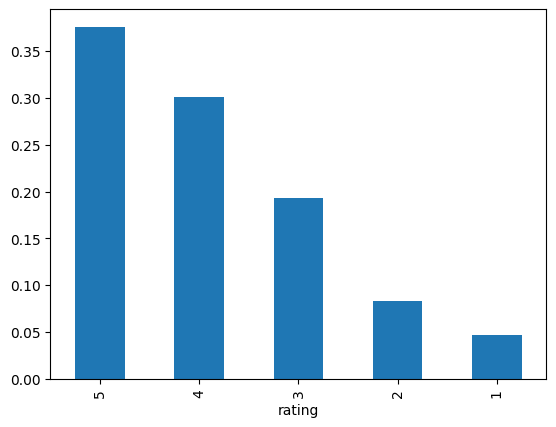

In [13]:
# checking the distribution of the rating column

print(dataset['rating'].value_counts(normalize=True).plot(kind='bar'))

### Preprocessing

In [14]:
# dropping unecessary columns

dataset = dataset.drop(['review_id','user_id','book_id'], axis=1)

In [15]:
# checking the first 5 rows of the dataset

print(dataset.head())

   rating                                             review
0       5   كتاب فوق الرائع. غير عادى. حزين ومميز وفريد ت...
1       5   من اروع الكتب يلي انا عشت بين صفحاته . من ارو...
2       4   لا أكادُ أصدق بأنني أنهيتُ قراءة رواية سقف ال...
3       4   الحلم .ماهو؟ اجملها وطبعا تنسى كأنك لم تكن مع...
4       4   أرقص كما لو أن أحداً لا يراك غني كما لو أن أح...


In [16]:
# dropping the duplicated review

# checking fo duplicates in review

dataset = dataset.drop_duplicates(subset='review', keep='first')

# checking the first 5 rows of the dataset

print(dataset.head())

   rating                                             review
0       5   كتاب فوق الرائع. غير عادى. حزين ومميز وفريد ت...
1       5   من اروع الكتب يلي انا عشت بين صفحاته . من ارو...
2       4   لا أكادُ أصدق بأنني أنهيتُ قراءة رواية سقف ال...
3       4   الحلم .ماهو؟ اجملها وطبعا تنسى كأنك لم تكن مع...
4       4   أرقص كما لو أن أحداً لا يراك غني كما لو أن أح...


In [17]:
# Check for duplicates
duplicates = dataset.duplicated(subset='review', keep='first')

# Print the number of duplicates
print(f"Number of duplicate reviews: {duplicates.sum()}")

Number of duplicate reviews: 0


### Data cleaning

Our cleaning pipeline contains the following steps:

0.  Remove duplicat entries
1.  Replacing emojies & emoticons
2.  Remove mentions
3.  Remove Links
6.  Remove whitespaces
7.  Remove 'Harakat'
8.  Remove punctuations & Special chars
9.  Remove Consecutive characters
10.  Tokenization
11. Remove foreign words
12. Remove stop words
13. Remove numbers

In [18]:
!pip install emoji

In [19]:
import re
import string
import nltk
import emoji

In [20]:
emojis = {
    "🙂":"يبتسم",
    "😂":"يضحك",
    "🤣" : "يضحك",
    "💔":"قلب حزين",
    "🙂":"يبتسم",
    "❤️":"حب",
    "🥰":"حب",
    "🤐":"سكوت",
    "🧡":"حب",
    "❤":"حب",
    "😍":"حب",
    "😭":"يبكي",
    "🤭":"يبتسم",
    "😢":"حزن",
    "😔":"حزن",
    "♥":"حب",
    "💜":"حب",
    "😅":"يضحك",
    "🙁":"حزين",
    "💕":"حب",
    "💙":"حب",
    "😞":"حزين",
    "😊":"سعادة",
    "👏":"يصفق",
    "👌":"احسنت",
    "😴":"ينام",
    "😀":"يضحك",
    "✅":"صحيح",
    "🤪":"يضحك",
    "🏡" : "بيت",
    "🤲" : "دعاء",
    "💰" : "مال",
    "😌":"حزين",
    "🎁":"هدية",
    "🌹":"وردة",
    "🥀":"وردة",
    "📿":"وردة",
    "✍":"كتابة",
    "🙈":"حب",
    "😄":"يضحك",
    "😐":"محايد",
    "✌":"منتصر",
    "✨":"نجمه",
    "🤔":"تفكير",
    "😏":"يستهزء",
    "😒":"يستهزء",
    "🙄":"ملل",
    "😕":"عصبية",
    "😃":"يضحك",
    "🌸":"وردة",
    "😓":"حزن",
    "💞":"حب",
    "💗":"حب",
    "😑":"منزعج",
    "💭":"تفكير",
    "😎":"ثقة",
    "💛":"حب",
    "😩":"حزين",
    "🥺":"حزين",
    "💪":"عضلات",
    "👍":"موافق",
    "🙏🏻":"رجاء طلب",
    "😳":"مصدوم",
    "👏🏼":"تصفيق",
    "🎶":"موسيقي",
    "🌚":"صمت",
    "💚":"حب",
    "🙏":"رجاء طلب",
    "💘":"حب",
    "🍃":"سلام",
    "☺":"يضحك",
    "🎊":"يهنئ",
    "💥":"إنفجار",
    "😝":"يسخر",
    "💯":"تمام",
    "🐸":"ضفدع",
    "🤦‍♂️":"غبي",
    "🤩":"معجب",
    "🤤":"جائع",
    "😶":"مصدوم",
    "✌️":"مرح",
    "✋🏻":"توقف",
    "😉":"غمزة",
    "🌷":"حب",
    "🙃":"مبتسم",
    "😫":"حزين",
    "😨":"مصدوم",
    "🎼 ":"موسيقي",
    "🍁":"مرح",
    "🍂":"مرح",
    "💟":"حب",
    "😪":"حزن",
    "😆":"يضحك",
    "😣":"استياء",
    "☺️":"حب",
    "😱":"كارثة",
    "😁":"يضحك",
    "😖":"استياء",
    "🏃🏼":"يجري",
    "😡":"غضب",
    "🚶":"يسير",
    "🤕":"مرض",
    "🤮" : "يتقيئ",
    "⛔": "حذر",
    "‼️":"تعجب",
    "🕊":"طائر",
    "👌🏻":"احسنت",
    "❣":"حب",
    "🙊":"مصدوم",
    "💃":"سعادة مرح",
    "💃🏼":"سعادة مرح",
    "😜":"مرح",
    "👊":"ضربة",
    "😟":"استياء",
    "💖":"حب",
    "😥":"حزن",
    "🎻":"موسيقي",
    "✒":"يكتب",
    "🚶🏻":"يسير",
    "💎":"الماظ",
    "😷":"وباء مرض",
    "☝":"واحد",
    "🚬":"تدخين",
    "💐" : "ورد",
    "🌻" : "ورد",
    "🌞" : "شمس",
    "👆" : "الاول",
    "⚠️" :"تحذير",
    "🤗" : "احتواء",
    "✖️": "غلط",
    "📍"  : "مكان",
    "👸" : "ملكه",
    "👑" : "تاج",
    "✔️" : "صح",
    "💌": "قلب",
    "😲" : "مندهش",
    "💦": "ماء",
    "🚫" : "خطا",
    "👏🏻" : "برافو",
    "🏊" :"يسبح",
    "👍🏻": "تمام",
    "⭕️" :"دائره كبيره",
    "🎷" : "ساكسفون",
    "👋": "تلويح باليد",
    "✌🏼": "علامه النصر",
    "🌝":"مبتسم",
    "➿"  : "عقده مزدوجه",
    "💪🏼" : "قوي",
    "📩":  "تواصل معي",
    "☕️": "قهوه",
    "😧" : "قلق و صدمة",
    "🗨": "رسالة",
    "❗️" :"تعجب",
    "🙆🏻": "اشاره موافقه",
    "👯" :"اخوات",
    "©" :  "رمز",
    "👵🏽" :"سيده عجوزه",
    "🐣": "كتكوت",
    "🙌": "تشجيع",
    "🙇": "شخص ينحني",
    "👐🏽":"ايدي مفتوحه",
    "👌🏽": "بالظبط",
    "⁉️" : "استنكار",
    "⚽️": "كوره",
    "🕶" :"حب",
    "🎈" :"بالون",
    "🎀":    "ورده",
    "💵":  "فلوس",
    "😋":  "جائع",
    "😛":  "يغيظ",
    "😠":  "غاضب",
    "✍🏻":  "يكتب",
    "🌾":  "ارز",
    "👣":  "اثر قدمين",
    "❌":"رفض",
    "🍟":"طعام",
    "👬":"صداقة",
    "🐰":"ارنب",
    "🦋" : "فراشة",
    "☂":"مطر",
    "⚜":"مملكة فرنسا",
    "🐑":"خروف",
    "🗣":"صوت مرتفع",
    "👌🏼":"احسنت",
    "☘":"مرح",
    "😮":"صدمة",
    "😦":"قلق",
    "⭕":"الحق",
    "✏️":"قلم",
    "ℹ":"معلومات",
    "🙍🏻":"رفض",
    "⚪️":"نضارة نقاء",
    "🐤":"حزن",
    "💫":"مرح",
    "💝":"حب",
    "🍔":"طعام",
    "❤︎":"حب",
    "✈️":"سفر",
    "🏃🏻‍♀️":"يسير",
    "🍳":"ذكر",
    "🎤":"مايك غناء",
    "🎾":"كره",
    "🐔":"دجاجة",
    "🙋":"سؤال",
    "📮":"بحر",
    "💉":"دواء",
    "🙏🏼":"رجاء طلب",
    "💂🏿 ":"حارس",
    "🎬":"سينما",
    "♦️":"مرح",
    "💡":"قكرة",
    "‼":"تعجب",
    "👼":"طفل",
    "🔑":"مفتاح",
    "♥️":"حب",
    "🌲" : "شجرة",
    "🌳" : "شجرة",
    "🚩" : "حذر",
    "🚨" : "حذر",
    "🛑" : "حذر",
    "🕋":"كعبة",
    "🐓":"دجاجة",
    "💩":"معترض",
    "👽":"فضائي",
    "☔️":"مطر",
    "🍷":"عصير",
    "🌟":"نجمة",
    "☁️":"سحب",
    "👃":"معترض",
    "🌺":"مرح",
    "🔪":"سكينة",
    "♨":"سخونية",
    "👊🏼":"ضرب",
    "✏":"قلم",
    "🚶🏾‍♀️":"يسير",
    "👊":"ضربة",
    "◾️":"وقف",
    "😚":"حب",
    "🔸":"مرح",
    "👎🏻":"لا يعجبني",
    "👊🏽":"ضربة",
    "😙":"حب",
    "🎥":"تصوير",
    "👉":"جذب انتباه",
    "👏🏽":"يصفق",
    "💪🏻":"عضلات",
    "🏴":"اسود",
    "🔥":"حريق",
    "😬":"عدم الراحة",
    "👊🏿":"يضرب",
    "📚" : "كتب",
    "📌" : "علق",
    "🌿":"ورقه شجره",
    "✋🏼":"كف ايد",
    "👐":"ايدي مفتوحه",
    "☠️":"وجه مرعب",
    "🎉":"يهنئ",
    "🔕" :"صامت",
    "😿":"وجه حزين",
    "☹️":"وجه يائس",
    "😘" :"حب",
    "😰" :"خوف و حزن",
    "🌼":"ورده",
    "💋": "بوسه",
    "👇":"لاسفل",
    "❣️":"حب",
    "🎧":"سماعات",
    "📝":"يكتب",
    "😇":"دايخ",
    "😈":"رعب",
    "🏃":"يجري",
    "✌🏻":"علامه النصر",
    "🔫":"يضرب",
    "❗️":"تعجب",
    "👎":"غير موافق",
    "🔐":"قفل",
    "👈":"لليمين",
    "™":"رمز",
    "🚶🏽":"يتمشي",
    "😯":"متفاجأ",
    "✊":"يد مغلقه",
    "😻":"اعجاب",
    "🙉" :"قرد",
    "👧":"طفله صغيره",
    "🔴":"دائره حمراء",
    "💪🏽":"قوه",
    "💤":"ينام",
    "👀":"ينظر",
    "✍🏻":"يكتب",
    "❄️":"تلج",
    "💀":"رعب",
    "😤":"وجه عابس",
    "🖋":"قلم",
    "🎩":"كاب",
    "☕️":"قهوه",
    "😹":"ضحك",
    "💓":"حب",
    "☄️":"نار",
    "👻":"رعب",
    "✋": "يد",
    "🌱": "نبتة",

    # Emoticons
    ":)" : "يبتسم",
    "(:" : "يبتسم",
    ":(" : "حزين",
    "xD" : "يضحك",
    ":=(": "يبكي",
    ":'(": "حزن",
    ":'‑(": "حزن",
    "XD" : "يضحك",
    ":D" : "يبتسم",
    "♬" : "موسيقي",
    "♡" : "حب",
    "☻"  : "يبتسم",
}

def replace_emojis(text):
    pattern = re.compile('|'.join(re.escape(key) for key in emojis.keys()))
    replaced_text = pattern.sub(lambda match: emojis[match.group(0)] + ' ', text)
    return emoji.replace_emoji(replaced_text, '')

dataset["review"] = dataset["review"].apply(lambda document: replace_emojis(document))

In [21]:
dataset.head()

,rating,review
0,5,كتاب فوق الرائع. غير عادى. حزين ومميز وفريد ت...
1,5,من اروع الكتب يلي انا عشت بين صفحاته . من ارو...
2,4,لا أكادُ أصدق بأنني أنهيتُ قراءة رواية سقف ال...
3,4,الحلم .ماهو؟ اجملها وطبعا تنسى كأنك لم تكن مع...
4,4,أرقص كما لو أن أحداً لا يراك غني كما لو أن أح...


In [22]:
# removing links

pattern = r'https?://\S+'
dataset["review"] = dataset["review"].apply(lambda document: re.sub(pattern, '', document))

In [23]:
# removing hashtags

pattern = r'#([\w\u0600-\u06FF]+)'
dataset["review"] = dataset["review"].apply(lambda document: re.sub(pattern, '', document))

In [24]:
# removing whitespaces

pattern = r'\s+|\n+'
dataset["review"] = dataset["review"].apply(lambda document: re.sub(pattern, ' ', document))

In [25]:
# removing foreign words

pattern = r'[a-zA-Z]+'
dataset["review"] = dataset["review"].apply(lambda document: re.sub(pattern, '', document))

In [26]:
# removing punctuations

pattern = r'[^\w\s\u0600-\u06FF]+|ﷺ|۩|⓵|؟|۞|ﷻ'
dataset["review"] = dataset["review"].apply(lambda document: re.sub(pattern, '', document))

In [27]:
# removing consecutive characters

pattern = r'(.)\1+'
dataset["review"] = dataset["review"].apply(lambda document: re.sub(pattern, r'\1', document))

In [28]:
# removing punctuations

pattern = r'\d+'
dataset["review"] = dataset["review"].apply(lambda document: re.sub(pattern, '', document))

In [29]:
!pip install pyarabic

In [30]:
# normalizing the text

import pyarabic.araby as araby

dataset["review"] = dataset["review"].apply(lambda document: araby.normalize_hamza(document))

In [31]:
!pip install Arabic-Stopwords

In [32]:
import arabicstopwords.arabicstopwords as stp
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# stop words removal

stemmer = ISRIStemmer()

arabic_stopwords = stopwords.words('arabic')
arabic_stopwords.extend(stp.stopwords_list())
stop_words = {entry for entry in arabic_stopwords}

with open("/content/drive/MyDrive/Parcours Academique/ENSAM/PFA/arabic_stopwords.txt", "r", encoding="UTF-8") as file:
    for word in file:
        stop_words.add(stemmer.stem(word.strip()))
stop_words

{'بذويه',
 'وبغيرهن',
 'أإنك',
 'ألذي',
 'ولشطرنا',
 'أبهناك',
 'بأيتهن',
 'اف',
 'سبعين',
 'أبهاتين',
 'تلقاءهن',
 'وسبحاني',
 'أتحتك',
 'مبر',
 'فبتلك',
 'أنتن',
 'شمالكما',
 'فبشهركن',
 'كأيتي',
 'فبحسبكم',
 'ليله',
 'وبشبهكن',
 'أفلستما',
 'وعل',
 'هج',
 'أفكعينكما',
 'ءَ',
 'أوكأنهما',
 'أفلهم',
 'تارة',
 'وبجنوبهما',
 'لطفق',
 'أأجمعهن',
 'نَخْ',
 'أفمننا',
 'وبعدهما',
 'وكبعضهن',
 'ففينا',
 'أفبشبههم',
 'وبغربكم',
 'ولفوقك',
 'ألشمالي',
 'ولأعلي',
 'أوكغيركم',
 'وشمالهم',
 'يميني',
 'بغروبهن',
 'وبنحوي',
 'ولشمالهم',
 'أكشبهك',
 'وبلحظتي',
 'وعنهم',
 'أوبهما',
 'فتجاهها',
 'أوبضعكن',
 'وشطركما',
 'وعنها',
 'أفنحوي',
 'وبجميعكن',
 'وكشهرك',
 'أوكحسبه',
 'أكذلك',
 'أفلكن',
 'لتينك',
 'ففوقهن',
 'وكساعتها',
 'فخلفك',
 'ولأقلهن',
 'فلعلنا',
 'فأبيهم',
 'فلعين',
 'وإما',
 'فلابنكم',
 'أوأجمعهما',
 'حميكم',
 'فيميني',
 'ولأوشك',
 'أوإني',
 'أولعليها',
 'فلمنهن',
 'أمثلما',
 'بوقتي',
 'حلى',
 'وبلا',
 'لعليكم',
 'لغيري',
 'وبعضه',
 'لمع',
 'فلاستحال',
 'فبأكثري',
 'أيكم',
 'ولابنك',
 '

In [34]:
#
dataset.head()

,rating,review
0,5,كتاب فوق الراءع غير عادى حزين وميز وفريد تركي...
1,5,من اروع الكتب يلي انا عشت بين صفحاته من اروع ...
2,4,لا ءكادُ ءصدق بءني ءنهيتُ قراءة رواية سقف الك...
3,4,الحلم ماهو اجملها وطبعا تنسى كءنك لم تكن معشو...
4,4,ءرقص كما لو ءن ءحداً لا يراك غني كما لو ءن ءح...


In [35]:
def remove_stop_words(tweet: str) -> str:
    words = set(tweet.split(sep = ' '))
    return " ".join(list((words - stop_words)))

dataset["review"] = dataset["review"].apply(lambda document: remove_stop_words(document))

In [36]:
dataset.head()

,rating,review
0,5,وميز وعنوان لدرجة عادى كتاب الراءع حزين وفريد...
1,5,ارق رغم اروع مدرسة عشت دروس صفحاته كتاب الحيا...
2,4,الكتابة ءنه متعب الحبيب نقوم ءمل الزمن نحب ءن...
3,4,سيبقى ضرورى دنقل الكتاب الجنوبى ءقرء كءنك ءمل...
4,4,جرحك ءرقص يسمعك ءن احب غني يراك ءحداً


use farasa or stanza for tokenization

In [37]:
!pip install farasapy

In [38]:
from farasa.segmenter import FarasaSegmenter

segmenter = FarasaSegmenter(interactive=True)

def tokenize_arabic(text):
    return segmenter.segment(text).split()

dataset["review"] = dataset["review"].apply(tokenize_arabic)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'farasa-api.qcri.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


100%|██████████| 241M/241M [03:36<00:00, 1.11MiB/s]


[2024-05-03 20:09:23,424 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [42]:
!pip install Tashaphyne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 3.4 MB/s eta 0:00:00


In [43]:
# stemming

from tashaphyne.stemming import ArabicLightStemmer

stemmer = ArabicLightStemmer()

def stem_words(text):
    return [stemmer.light_stem(word) for word in text]

dataset["review"] = dataset["review"].apply(stem_words)

In [44]:
dataset.to_csv("res.csv") # inspect the resulting file to validate the preprocessing